In [2]:
import pandas as pd
import numpy as np


In [4]:
data=pd.read_csv('/content/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
data.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [6]:
data.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [7]:
data.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [8]:
data.shape

(344, 7)

UNIVARIATE VISUALIZATIONS

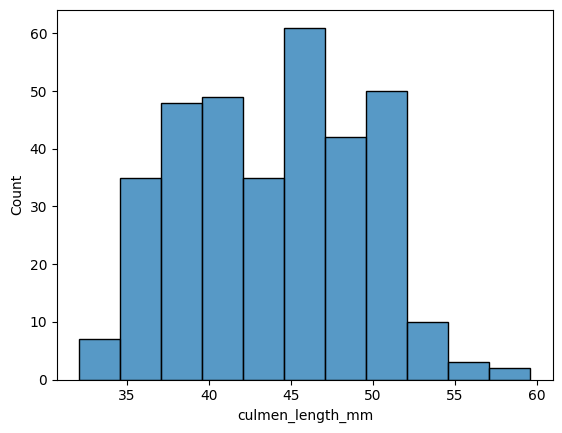

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['culmen_length_mm'])
plt.show()

<ipython-input-10-ac3ad9fc6169>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['culmen_length_mm'])


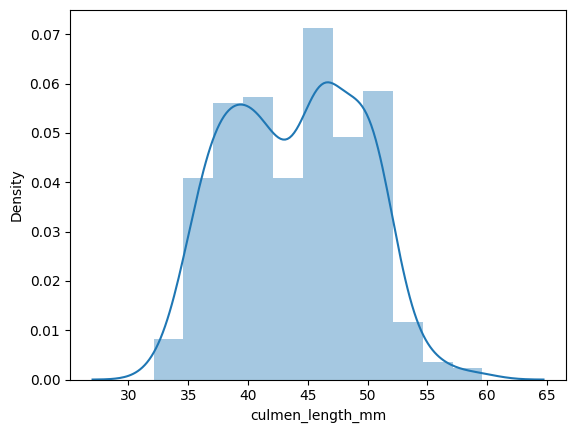

In [10]:
sns.distplot(data['culmen_length_mm'])
plt.show()

In [12]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

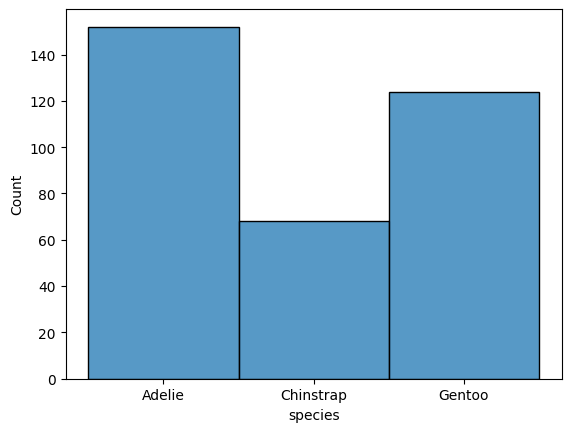

In [13]:
sns.histplot(data['species'].value_counts(),x=data['species'])
plt.show()

In [14]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<Axes: xlabel='sex', ylabel='Count'>

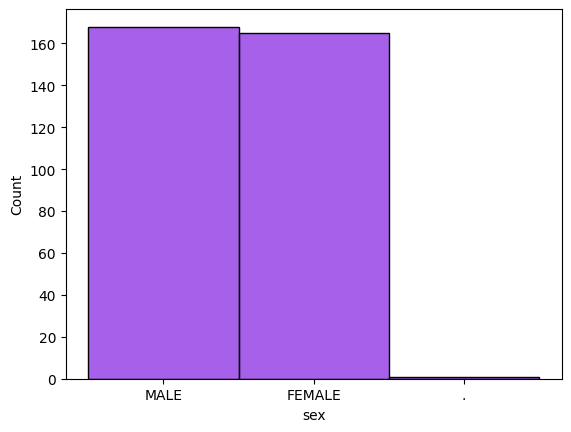

In [15]:
sns.histplot(data['sex'].value_counts(),x=data['sex'],fill=True,color='blueviolet')

Index(['MALE', 'FEMALE', '.'], dtype='object')

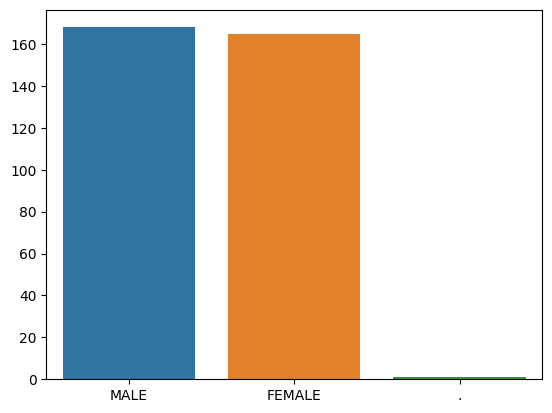

In [16]:
sex_counts=data['sex'].value_counts()

sns.barplot(x=sex_counts.index,y=sex_counts.values)
sex_counts.index

([<matplotlib.patches.Wedge at 0x77ff5f429810>,
 [Text(-0.010346371834497005, 1.0999513410100752, ''),
  Text(-1.029894329174279e-07, -1.0999999999999954, ''),
  Text(2.0999071025595013, -0.019752483898488604, '')],
 [Text(-0.005643475546089275, 0.5999734587327682, '50.3%'),
  Text(-5.617605431859703e-08, -0.5999999999999974, '49.4%'),
  Text(1.5999292209977152, -0.015049511541705602, '0.3%')])

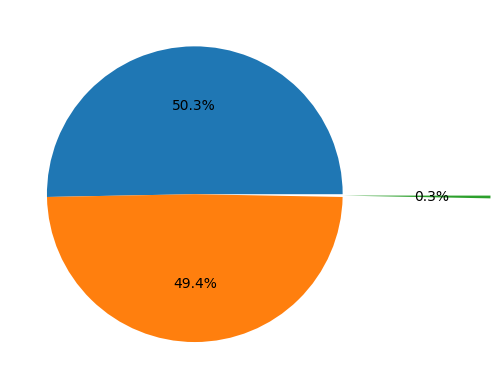

In [17]:
plt.pie(sex_counts.values,explode=[0,0,1],autopct="%1.1f%%")

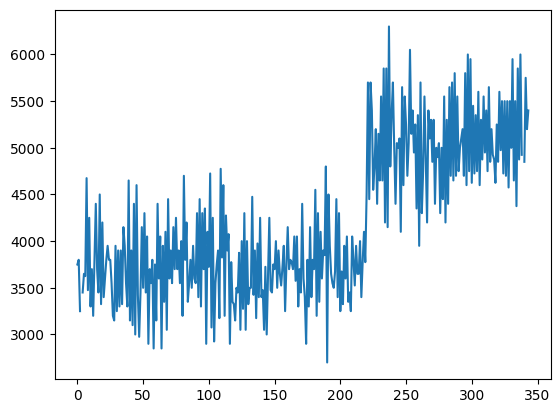

In [18]:
plt.plot(data['body_mass_g'])

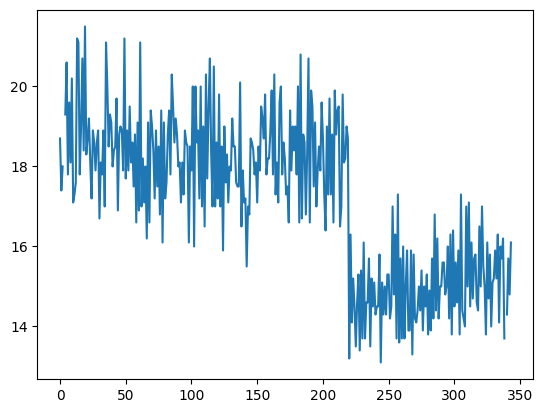

In [19]:
plt.plot(data['culmen_depth_mm'])

<Axes: >

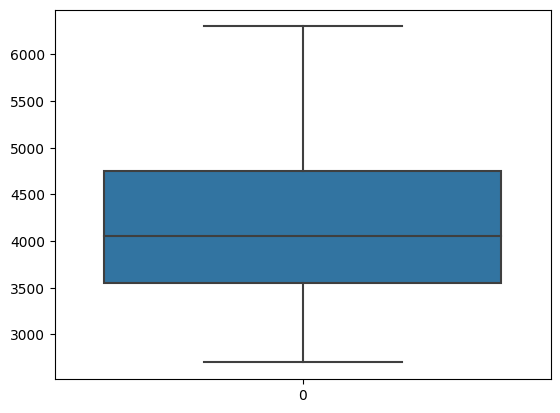

In [20]:
sns.boxplot(data['body_mass_g'])

<Axes: >

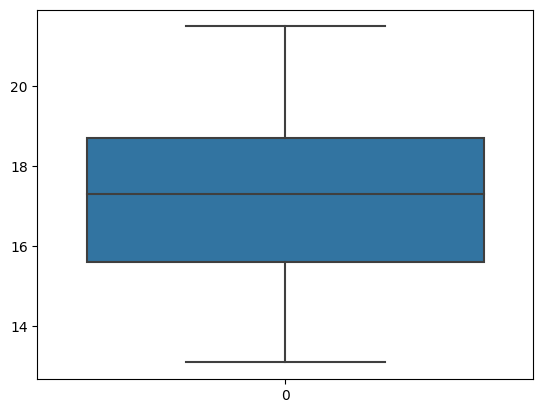

In [21]:
sns.boxplot(data['culmen_depth_mm'])

<Axes: >

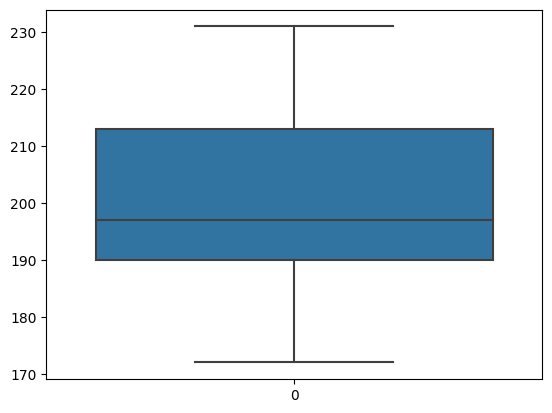

In [22]:
sns.boxplot(data['flipper_length_mm'])

<Axes: ylabel='body_mass_g'>

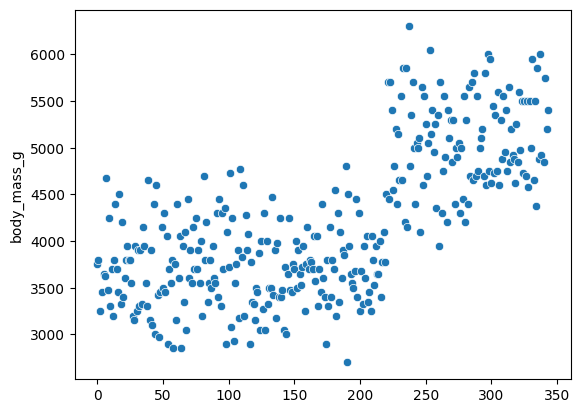

In [23]:
sns.scatterplot(data['body_mass_g'])

<Axes: ylabel='culmen_depth_mm'>

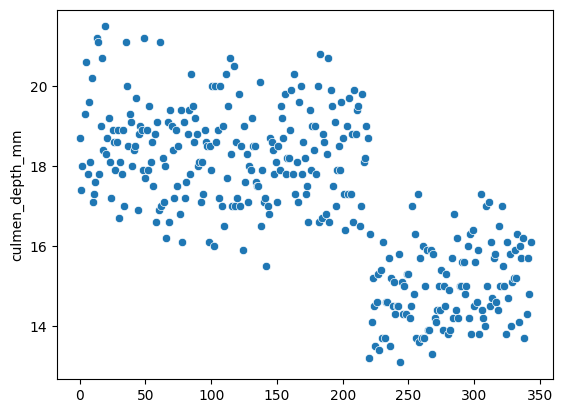

In [24]:
sns.scatterplot(data['culmen_depth_mm'])

<Axes: xlabel='body_mass_g', ylabel='culmen_depth_mm'>

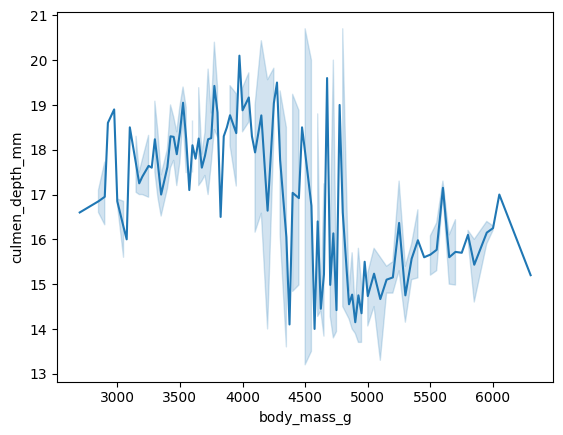

In [26]:
from enum import auto
sns.lineplot(x=data['body_mass_g'],y=data['culmen_depth_mm'],legend="auto")

<Axes: xlabel='body_mass_g', ylabel='culmen_depth_mm'>

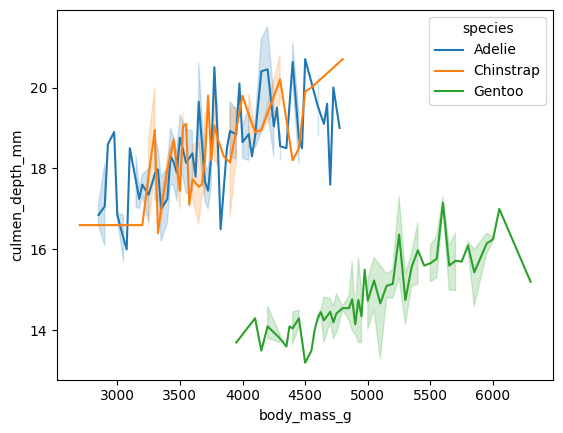

In [27]:
sns.lineplot(x=data['body_mass_g'],y=data['culmen_depth_mm'],legend="auto",hue=data['species'])

<Axes: xlabel='body_mass_g', ylabel='culmen_depth_mm'>

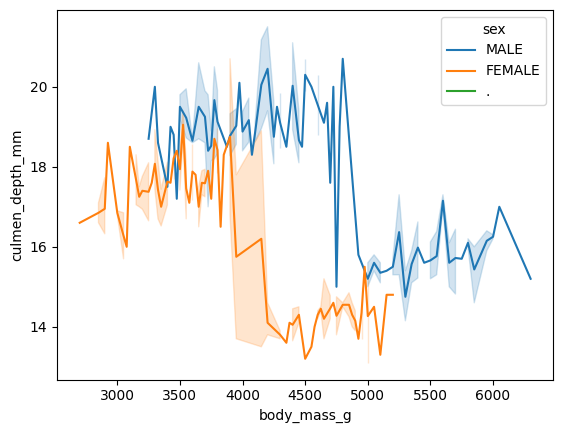

In [28]:
sns.lineplot(x=data['body_mass_g'],y=data['culmen_depth_mm'],legend="auto",hue=data['sex'])

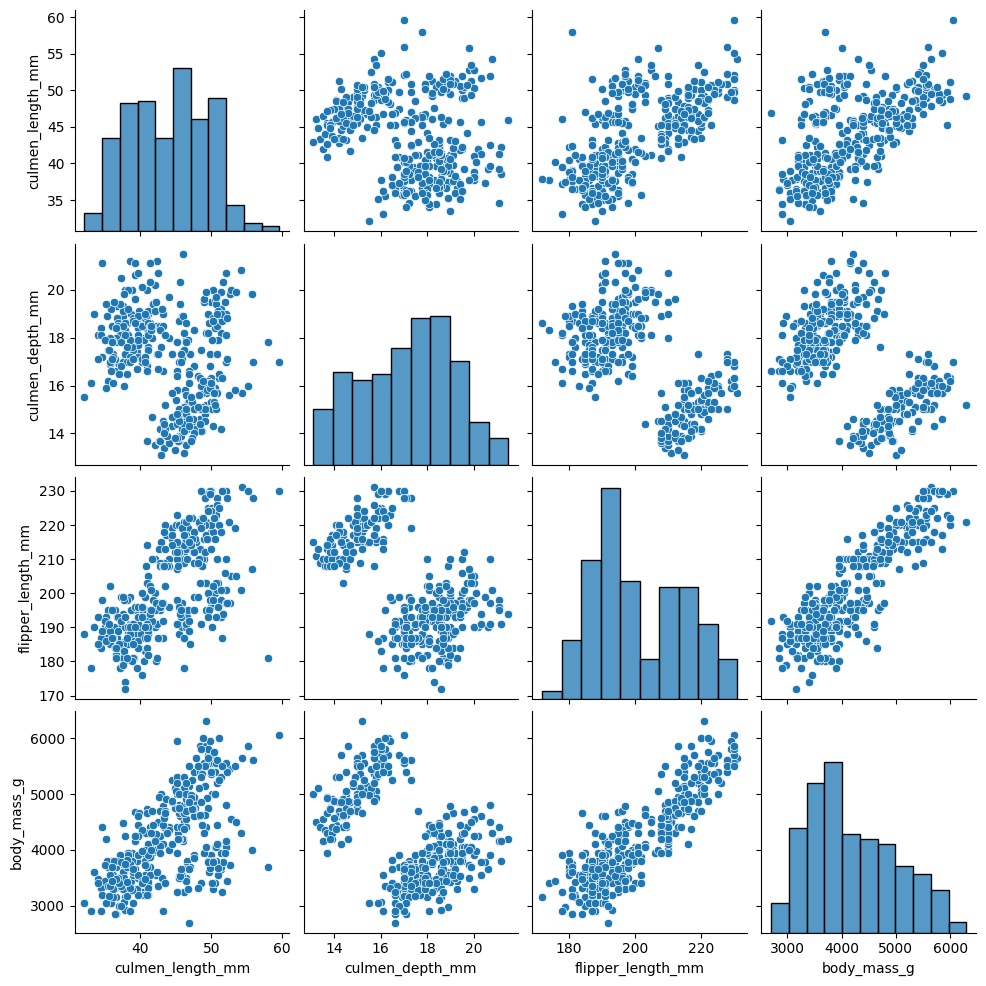

In [29]:
sns.pairplot(data)

Text(0.5, 1.0, 'correlation Heatmap (Numeric columns only)')

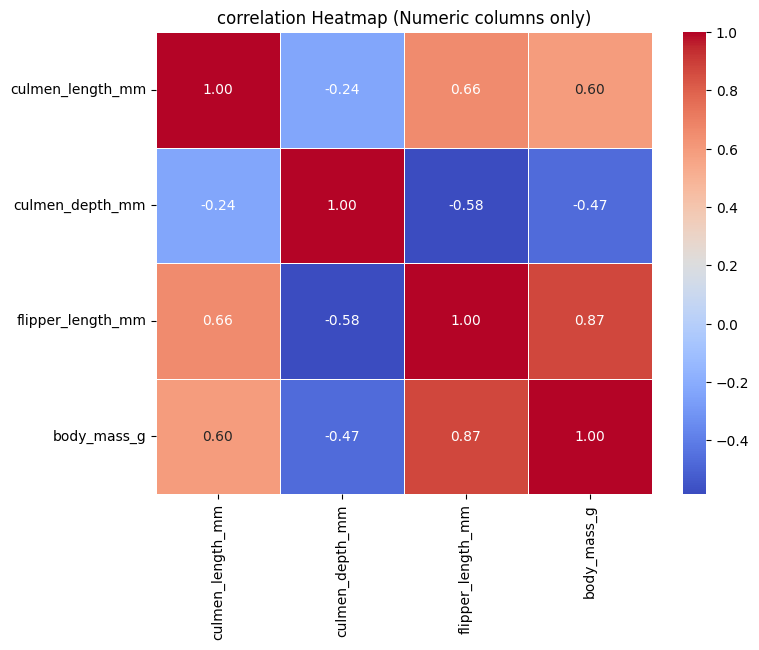

In [31]:
numeric_columns=data.select_dtypes(include=['number'])
correlation_matrix=numeric_columns.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('correlation Heatmap (Numeric columns only)')

DESCRIPTIVE ANALYSIS

In [32]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [33]:
data.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [34]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

replacing null values

In [35]:
lmedian=data['culmen_length_mm'].median()
data['culmen_length_mm'].fillna(lmedian,inplace=True)

In [36]:
dmedian=data['culmen_depth_mm'].median()
data['culmen_depth_mm'].fillna(dmedian,inplace=True)

In [37]:
flipper=data['flipper_length_mm'].median()
data['flipper_length_mm'].fillna(flipper,inplace=True)

In [38]:
bodymass=data['body_mass_g'].median()
data['body_mass_g'].fillna(bodymass,inplace=True)

In [39]:
modesex=data['sex'].mode()[0]
data['sex'].fillna(modesex,inplace=True)

In [41]:
data.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [42]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [46]:
data['sex']=data['sex'].replace(".",modesex)

In [47]:
data.sex.value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
data['sex']=le.fit_transform(data['sex'])
data['species']=le.fit_transform(data['species'])
data['island']=le.fit_transform(data['island'])

In [52]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


In [51]:
y=data['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [54]:
x=data.drop(columns=['species'])
x

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0
...,...,...,...,...,...,...
339,0,44.45,17.3,197.0,4050.0,1
340,0,46.80,14.3,215.0,4850.0,0
341,0,50.40,15.7,222.0,5750.0,1
342,0,45.20,14.8,212.0,5200.0,0


In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [58]:
x_scaled=scaler.fit_transform(x)
pd.DataFrame(x_scaled,columns=x.columns)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.844076,-0.887622,0.787289,-1.420541,-0.564625,0.960098
1,1.844076,-0.814037,0.126114,-1.063485,-0.502010,-1.041561
2,1.844076,-0.666866,0.431272,-0.420786,-1.190773,-1.041561
3,1.844076,0.096581,0.075255,-0.277964,-0.188936,0.960098
4,1.844076,-1.329133,1.092447,-0.563608,-0.940314,-1.041561
...,...,...,...,...,...,...
339,-0.914020,0.096581,0.075255,-0.277964,-0.188936,0.960098
340,-0.914020,0.528894,-1.450534,1.007436,0.812900,-1.041561
341,-0.914020,1.191161,-0.738500,1.507314,1.939966,0.960098
342,-0.914020,0.234553,-1.196236,0.793203,1.251204,-1.041561


In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [61]:
x_train.shape

(275, 6)

In [62]:
x_test.shape

(69, 6)

In [63]:
y_train.shape

(275,)

In [64]:
y_test.shape

(69,)